In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

mnist_train = pd.read_csv("../../data/train.csv")
data = mnist_train.drop("label",1).values
target = mnist_train["label"].values
indices = np.random.permutation(len(data))

train_data  = data[indices[:-10000]]
train_target = target[indices[:-10000]]

validation_data = data[indices[-10000:]]
validation_target = target[indices[-10000:]]

mnist_test = pd.read_csv("../../data/test.csv")
test_data = mnist_test.values

<function matplotlib.pyplot.show>

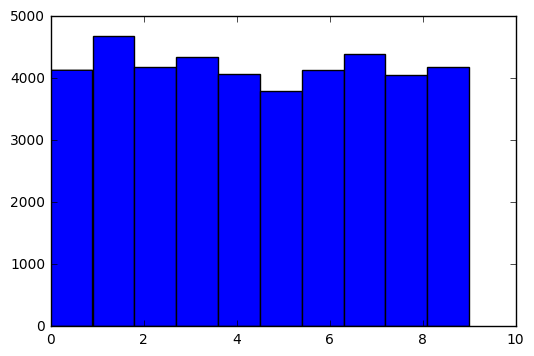

In [25]:
plt.hist(target,10)
plt.show

<function matplotlib.pyplot.show>

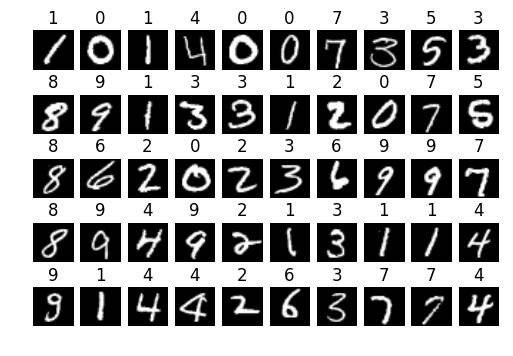

In [2]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_data[i,:].reshape(28,28), cmap='gray')
    plt.title(train_target[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

score = clf.score(validation_data, validation_target)
print(score)

test_predictions = clf.predict(test_data)


0.8533


<function matplotlib.pyplot.show>

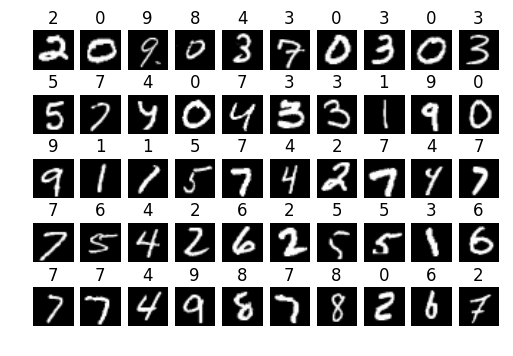

In [4]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_predictions[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [5]:
from sklearn.ensemble import RandomForestClassifier
randclf = RandomForestClassifier(n_estimators = 200)
randclf.fit(data,target)

randscore = randclf.score(validation_data, validation_target)
print(randscore)

test_pred = randclf.predict(test_data)

1.0


<function matplotlib.pyplot.show>

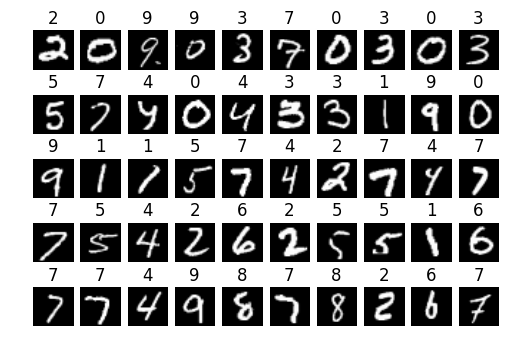

In [6]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_pred[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [7]:
df = pd.DataFrame({'ImageId' : np.arange(1, test_pred.size + 1),
                   'Label'   : test_pred})
df.to_csv('../../submission/submission.csv',index=False)

In [19]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# pca with 20 estimators and whitening(removes some informationr 
# but can improve performance)
pca = PCA(n_components = 35, whiten=True)
pca.fit(train_data)
new_train_data = pca.transform(data)

svc = SVC()
svc.fit(new_train_data, target)

new_val_data = pca.transform(validation_data)
svc.score(new_val_data, validation_target)

0.99309999999999998

In [20]:
new_test_data = pca.transform(test_data)
test_predictions_svc = svc.predict(new_test_data)

In [22]:
df = pd.DataFrame({'ImageId' : np.arange(1, test_predictions_svc.size + 1),
                   'Label'   : test_predictions_svc})
df.to_csv('../../submission/submission.csv',index=False)